In [69]:
## LIBS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import utils
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


In [70]:
main = pd.read_csv(r"C:\Users\yashk\Desktop\ProjectML\data.csv.csv")


In [71]:
main.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [72]:
##Removing id 
if 'id' in main.columns:
    main = main.drop(['id'], axis=1)
else:
    print("'id' column not found")
## Changing catarorical to numerical(Gender)
main.loc[main['Gender'] == 'Male', 'Gender'] = 0
main.loc[main['Gender'] == 'Female', 'Gender'] = 1
main.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,1,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,0,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,1,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,1,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [73]:
main['City'].value_counts()

City
Kalyan                1570
Srinagar              1372
Hyderabad             1340
Vasai-Virar           1290
Lucknow               1155
Thane                 1139
Ludhiana              1111
Agra                  1094
Surat                 1078
Kolkata               1066
Jaipur                1036
Patna                 1007
Visakhapatnam          969
Pune                   968
Ahmedabad              951
Bhopal                 934
Chennai                885
Meerut                 825
Rajkot                 816
Delhi                  768
Bangalore              767
Ghaziabad              745
Mumbai                 699
Vadodara               694
Varanasi               685
Nagpur                 651
Indore                 643
Kanpur                 609
Nashik                 547
Faridabad              461
Saanvi                   2
Bhavna                   2
City                     2
Harsha                   2
Less Delhi               1
M.Tech                   1
3.0                    

In [74]:
cities_to_remove = main['City'].value_counts()[main['City'].value_counts() < 450]
main = main[~main['City'].isin(cities_to_remove.index)]
main['City'].value_counts()

City
Kalyan           1570
Srinagar         1372
Hyderabad        1340
Vasai-Virar      1290
Lucknow          1155
Thane            1139
Ludhiana         1111
Agra             1094
Surat            1078
Kolkata          1066
Jaipur           1036
Patna            1007
Visakhapatnam     969
Pune              968
Ahmedabad         951
Bhopal            934
Chennai           885
Meerut            825
Rajkot            816
Delhi             768
Bangalore         767
Ghaziabad         745
Mumbai            699
Vadodara          694
Varanasi          685
Nagpur            651
Indore            643
Kanpur            609
Nashik            547
Faridabad         461
Name: count, dtype: int64

In [75]:
main['Profession'].value_counts()

Profession
Student                   27844
Architect                     8
Teacher                       6
Digital Marketer              3
Chef                          2
Content Writer                2
Pharmacist                    2
Doctor                        2
UX/UI Designer                1
Civil Engineer                1
Manager                       1
Educational Consultant        1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64

In [76]:
main = main.loc[main['Profession']=='Student']
main['Profession'].value_counts()


Profession
Student    27844
Name: count, dtype: int64

In [77]:
main = main.drop(['Profession'], axis=1)

In [78]:
main['Work Pressure'].value_counts()

Work Pressure
0.0    27841
5.0        2
2.0        1
Name: count, dtype: int64

In [79]:
main = main.loc[main['Work Pressure']==0.0]
main['Work Pressure'].value_counts()


Work Pressure
0.0    27841
Name: count, dtype: int64

In [80]:
main.head(3)

,Gender,Age,City,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,33.0,Visakhapatnam,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,1,24.0,Bangalore,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,0,31.0,Srinagar,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0


In [81]:
main = main.drop(['Work Pressure'], axis=1)
main.head(3)

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,33.0,Visakhapatnam,5.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,1,24.0,Bangalore,2.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,0,31.0,Srinagar,3.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0


In [82]:
main['Age'].value_counts()

Age
24.0    2255
20.0    2235
28.0    2128
29.0    1940
33.0    1892
25.0    1780
21.0    1717
23.0    1640
18.0    1585
19.0    1560
34.0    1466
27.0    1459
31.0    1422
32.0    1258
22.0    1159
26.0    1153
30.0    1144
35.0      10
38.0       7
36.0       7
42.0       4
39.0       3
48.0       3
46.0       2
43.0       2
37.0       2
44.0       1
51.0       1
49.0       1
58.0       1
54.0       1
59.0       1
56.0       1
41.0       1
Name: count, dtype: int64

In [83]:
main = main.loc[main['Age'] <= 28]

In [84]:
main['Age'].value_counts()

Age
24.0    2255
20.0    2235
28.0    2128
25.0    1780
21.0    1717
23.0    1640
18.0    1585
19.0    1560
27.0    1459
22.0    1159
26.0    1153
Name: count, dtype: int64

In [85]:
main['Job Satisfaction'].value_counts()

Job Satisfaction
0.0    18667
2.0        3
1.0        1
Name: count, dtype: int64

In [86]:
main = main.drop(['Job Satisfaction'],axis = 1)

In [87]:
main.head(3)

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
1,1,24.0,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
3,1,28.0,Varanasi,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,1,25.0,Jaipur,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [88]:
main['Sleep Duration'].value_counts()
main = main.loc[main['Sleep Duration'] != 'Others']
main['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    5616
7-8 hours            4928
5-6 hours            4068
More than 8 hours    4049
Name: count, dtype: int64

In [89]:
main.loc[main['Sleep Duration'] == 'Less than 5 hours', 'Sleep Duration'] = 0
main.loc[main['Sleep Duration'] == '5-6 hours', 'Sleep Duration'] = 1
main.loc[main['Sleep Duration'] == '7-8 hours', 'Sleep Duration'] = 2
main.loc[main['Sleep Duration'] == 'More than 8 hours', 'Sleep Duration'] = 3
main['Sleep Duration'].value_counts()

Sleep Duration
0    5616
2    4928
1    4068
3    4049
Name: count, dtype: int64

In [90]:
main['Dietary Habits'].value_counts()
main = main.loc[main['Dietary Habits'] != 'Others']
main['Dietary Habits'].value_counts()

Dietary Habits
Unhealthy    7288
Moderate     6403
Healthy      4962
Name: count, dtype: int64

In [91]:
main.loc[main['Dietary Habits'] == 'Healthy', 'Dietary Habits'] = 0
main.loc[main['Dietary Habits'] == 'Unhealthy', 'Dietary Habits'] = 1
main.loc[main['Dietary Habits'] == 'Moderate', 'Dietary Habits'] = 2
main['Dietary Habits'].value_counts()

Dietary Habits
1    7288
2    6403
0    4962
Name: count, dtype: int64

In [92]:
main['Degree'].unique()

array(['BSc', 'BCA', 'M.Tech', 'B.Ed', 'Class 12', 'M.Ed', 'MSc', 'BHM',
       'M.Pharm', 'MCA', 'MA', 'B.Pharm', 'B.Com', 'MD', 'BE', 'BA',
       'MBBS', 'B.Arch', 'LLM', 'B.Tech', 'BBA', 'M.Com', 'MBA', 'PhD',
       'LLB', 'Others', 'MHM', 'ME'], dtype=object)

In [93]:
## CREATING NEW DEGREE COLUMN WITH ONLY GRADUATED, POST GRADUATED AND HIGHER SECONDARY
main.loc[main['Degree'].str.contains(r'BSc|BCA|B.Ed|BHM|B.Pharm|B.Com|BE|BA|B.Arch|B.Tech|BBA|LLB', regex=True), 'New_Degree'] = 'Graduated'
main.loc[main['Degree'].str.contains(r'MSc|MCA|M.Ed|M.Pharm|M.Com|ME|MA|M.Arch|M.Tech|MBA|LLM', regex=True), 'New_Degree'] = 'Post Graduated'
main.loc[main['Degree'] == 'Class 12', 'New_Degree'] = 'Higher Secondary'
main = main.loc[main['Degree'] != 'Others']
main['New_Degree'].value_counts()

New_Degree
Graduated           8199
Higher Secondary    5778
Post Graduated      3723
Name: count, dtype: int64

In [94]:
main.loc[main['New_Degree'] == 'Graduated', 'New_Degree'] = 0
main.loc[main['New_Degree'] == 'Post Graduated', 'New_Degree'] = 1
main.loc[main['New_Degree'] == 'Higher Secondary', 'New_Degree'] = 2
main['New_Degree'].value_counts()

New_Degree
0    8199
2    5778
1    3723
Name: count, dtype: int64

In [95]:
main['Have you ever had suicidal thoughts ?'].value_counts()

Have you ever had suicidal thoughts ?
Yes    12468
No      6163
Name: count, dtype: int64

In [96]:
main.loc[main['Have you ever had suicidal thoughts ?'] == 'Yes', 'Have you ever had suicidal thoughts ?'] = 1
main.loc[main['Have you ever had suicidal thoughts ?'] == 'No', 'Have you ever had suicidal thoughts ?'] = 0
main['Have you ever had suicidal thoughts ?'].value_counts()

Have you ever had suicidal thoughts ?
1    12468
0     6163
Name: count, dtype: int64

In [97]:
main['Work/Study Hours'].value_counts()

Work/Study Hours
10.0    2875
12.0    2129
11.0    1988
8.0     1686
6.0     1501
7.0     1395
9.0     1385
0.0     1070
2.0     1025
4.0     1021
3.0      950
5.0      856
1.0      750
Name: count, dtype: int64

In [98]:
## CHECKING THE FINANCIAL STRESS
main['Financial Stress'].value_counts()

Financial Stress
5.0    4816
4.0    4054
3.0    3469
2.0    3262
1.0    3029
Name: count, dtype: int64

In [99]:
## CHECKING THE FAMILY HISTORY OF MENTAL ILLNESS
main['Family History of Mental Illness'].value_counts()

Family History of Mental Illness
No     9594
Yes    9037
Name: count, dtype: int64

In [100]:
## CHANGING FAMILY HISTORY OF MENTAL ILLNESS TO NUMERICAL
main.loc[main['Family History of Mental Illness'] == 'Yes', 'Family History of Mental Illness'] = 1
main.loc[main['Family History of Mental Illness'] == 'No', 'Family History of Mental Illness'] = 0
main['Family History of Mental Illness'].value_counts()

Family History of Mental Illness
0    9594
1    9037
Name: count, dtype: int64

In [101]:
main.head(5)

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,New_Degree
1,1,24.0,Bangalore,2.0,5.90,5.0,1,2,BSc,0,3.0,2.0,1,0,0
3,1,28.0,Varanasi,3.0,5.59,2.0,2,2,BCA,1,4.0,5.0,1,1,0
4,1,25.0,Jaipur,4.0,8.13,3.0,1,2,M.Tech,1,1.0,1.0,0,0,1
8,0,28.0,Nagpur,3.0,9.79,1.0,2,2,B.Ed,1,12.0,3.0,0,1,0
10,0,24.0,Nagpur,3.0,6.10,3.0,1,2,Class 12,1,11.0,1.0,1,1,2


In [102]:
main = main.drop(['Degree'],axis = 1 )

In [103]:
main.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,New_Degree
1,1,24.0,Bangalore,2.0,5.90,5.0,1,2,0,3.0,2.0,1,0,0
3,1,28.0,Varanasi,3.0,5.59,2.0,2,2,1,4.0,5.0,1,1,0
4,1,25.0,Jaipur,4.0,8.13,3.0,1,2,1,1.0,1.0,0,0,1
8,0,28.0,Nagpur,3.0,9.79,1.0,2,2,1,12.0,3.0,0,1,0
10,0,24.0,Nagpur,3.0,6.10,3.0,1,2,1,11.0,1.0,1,1,2


In [104]:
## CHECKING FOR NULL VALUES AND REMOVING
main.isnull().sum()
main = main.dropna()


In [105]:
##CREATING A NEW DF TO CHECK IF THERE IS ANY CORRELATION BETWEEN THE NUMERIC VARIABLES
main_data = main[['Gender', 'Age', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'New_Degree']]
main_data.head(3)

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,New_Degree
1,1,24.0,2.0,5.90,5.0,1,2,0,3.0,2.0,1,0,0
3,1,28.0,3.0,5.59,2.0,2,2,1,4.0,5.0,1,1,0
4,1,25.0,4.0,8.13,3.0,1,2,1,1.0,1.0,0,0,1


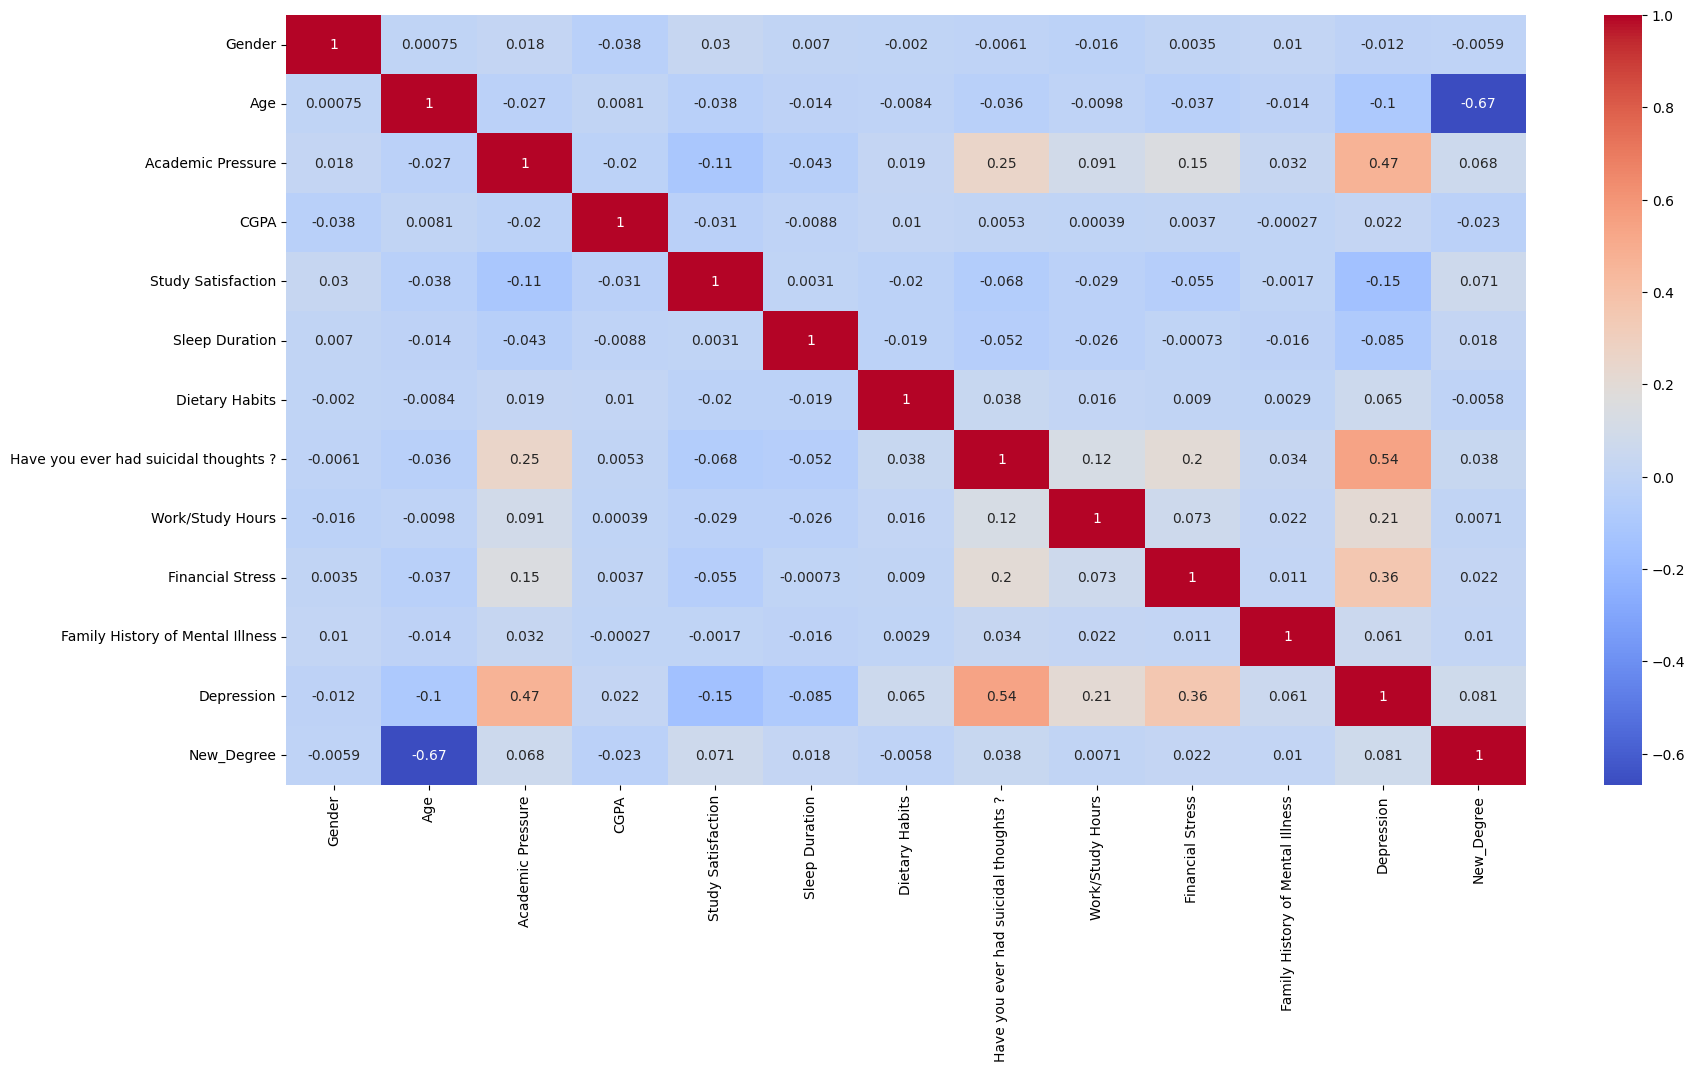

In [106]:
## PLOTTING THE CORRELATION MATRIX
plt.figure(figsize=(20, 10))
sns.heatmap(main_data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [107]:
## CREATING DUMMY VARIABLES FOR THE CITY COLUMN

encoder = OneHotEncoder(sparse_output=False)  
encoded = encoder.fit_transform(main[['City']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['City']))
## ADJUSTING THE INDEX
encoded_df.index = main.index
main_encoded = pd.concat([main, encoded_df], axis=1)

## CHECKING THE NEW DF
main_encoded.columns

Index(['Gender', 'Age', 'City', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'New_Degree', 'City_Agra', 'City_Ahmedabad', 'City_Bangalore',
       'City_Bhopal', 'City_Chennai', 'City_Delhi', 'City_Faridabad',
       'City_Ghaziabad', 'City_Hyderabad', 'City_Indore', 'City_Jaipur',
       'City_Kalyan', 'City_Kanpur', 'City_Kolkata', 'City_Lucknow',
       'City_Ludhiana', 'City_Meerut', 'City_Mumbai', 'City_Nagpur',
       'City_Nashik', 'City_Patna', 'City_Pune', 'City_Rajkot',
       'City_Srinagar', 'City_Surat', 'City_Thane', 'City_Vadodara',
       'City_Varanasi', 'City_Vasai-Virar', 'City_Visakhapatnam'],
      dtype='object')

In [108]:
main_encoded = main_encoded.drop(['City'], axis=1)

In [109]:
x = main_encoded.drop('Depression', axis=1).values  # Features
y = main_encoded['Depression'].values
print(x)

[[1 24.0 2.0 ... 0.0 0.0 0.0]
 [1 28.0 3.0 ... 1.0 0.0 0.0]
 [1 25.0 4.0 ... 0.0 0.0 0.0]
 ...
 [0 27.0 2.0 ... 0.0 0.0 0.0]
 [1 18.0 5.0 ... 0.0 0.0 0.0]
 [0 27.0 4.0 ... 0.0 0.0 0.0]]


In [110]:
print(y)

[0 1 0 ... 0 1 1]


In [111]:
print(f"the shape of the inputs x is: {x.shape}")
print(f"the shape of the targets y is: {y.shape}")

the shape of the inputs x is: (17700, 42)
the shape of the targets y is: (17700,)


In [143]:
## SPLITTING THE DATA INTO TRAIN AND TEST
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

## NORMALIZING THE DATA FEATURES USING STANDARD SCALER
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## TRAINING THE MODEL USING LOGISTIC REGRESSION
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

## SCORE
score = model.score(X_test_scaled, y_test)
print(f"Accuracy: {score*100:.2f}%")

Accuracy: 85.31%


In [144]:
models = {
   "Logistic Regression" : LogisticRegression() ,
   "Decision Tree" : DecisionTreeClassifier( random_state=42,
    max_depth=None,        
    min_samples_split=10, 
    min_samples_leaf=5,   
    criterion='entropy',    
    max_features='sqrt' ),
   "Random Forest" : RandomForestClassifier(  random_state=42,
    n_estimators=140,    
    max_depth=None,       
    min_samples_split=15,  
    min_samples_leaf=5,   
    max_features='sqrt',   
    bootstrap=True,      
    oob_score=True     ),    
    "XGBoost" : xgb.XGBClassifier ( random_state=42,
    n_estimators=200,        # Number of boosting rounds.
    max_depth=6,             # Maximum depth of a tree.
    learning_rate=0.1,       # Step size shrinkage to prevent overfitting.
    subsample=0.8,           # Subsample ratio of training samples.
    colsample_bytree=0.8,    # Subsample ratio of columns per tree.
    gamma=0,                 # Minimum loss reduction to split a node.
    reg_alpha=0,             # L1 regularization term on weights.
    reg_lambda=1     )
    }

accuracy_results = {} 


for name, model in models.items():
    model.fit(X_train_scaled, y_train)  
    y_pred = model.predict(X_test_scaled) 
    accuracy = accuracy_score(y_test, y_pred)  
    accuracy_results[name] = accuracy 

## ORDERING THE ACCURACY RESULTS FROM HIGHEST TO LOWEST
accuracy_results_ordened = dict(sorted(accuracy_results.items(), key=lambda item: item[1], reverse=True))



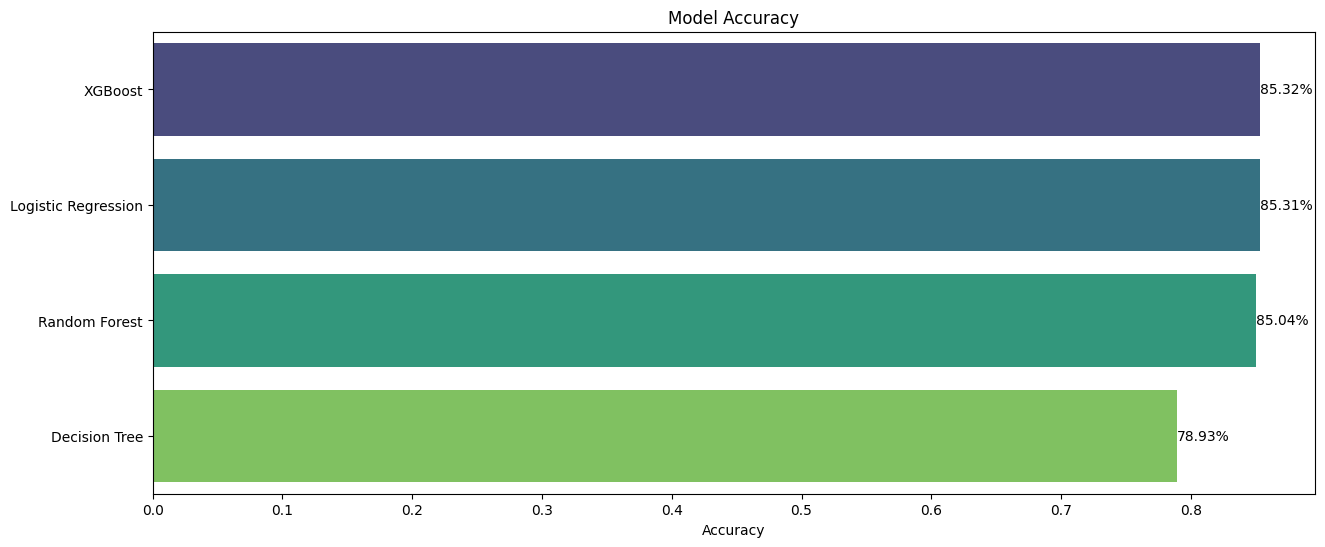

In [145]:
plt.figure(figsize=(15, 6))
sns.barplot(x=list(accuracy_results_ordened.values()), 
            y=list(accuracy_results_ordened.keys()), 
            palette='viridis')
plt.xlabel('Accuracy')
plt.title('Model Accuracy')
for i, v in enumerate(accuracy_results_ordened.values()):
    plt.text(v, i, f'{v*100:.2f}%', color='black', va='center')
plt.show()